### Project on Indian premier league

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read the data
data=pd.read_csv('ipl.csv')

In [4]:
#load the data
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


### Exploring the data

In [5]:
#shape of the data
data.shape

(76014, 15)

In [6]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [7]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mid,76014.0,308.627740,178.156878,1.0,154.0,308.0,463.0,617.0
runs,76014.0,74.889349,48.823327,0.0,34.0,70.0,111.0,263.0
wickets,76014.0,2.415844,2.015207,0.0,1.0,2.0,4.0,10.0
overs,76014.0,9.783068,5.772587,0.0,4.6,9.6,14.6,19.6
runs_last_5,76014.0,33.216434,14.914174,0.0,24.0,34.0,43.0,113.0
wickets_last_5,76014.0,1.120307,1.053343,0.0,0.0,1.0,2.0,7.0
striker,76014.0,24.962283,20.079752,0.0,10.0,20.0,35.0,175.0
non-striker,76014.0,8.869287,10.795742,0.0,1.0,5.0,13.0,109.0
total,76014.0,160.901452,29.246231,67.0,142.0,162.0,181.0,263.0


In [9]:
data.corr()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,0.026470,-0.055220,0.002487,0.045320,-0.031886,0.033432,0.049975,0.096586
runs,0.026470,1.000000,0.591007,0.938154,0.750565,0.297768,0.594818,0.315422,0.254498
wickets,-0.055220,0.591007,1.000000,0.755240,0.242942,0.693740,0.019712,-0.171962,-0.337343
overs,0.002487,0.938154,0.755240,1.000000,0.629374,0.382850,0.477508,0.236430,0.022282
runs_last_5,0.045320,0.750565,0.242942,0.629374,1.000000,0.058672,0.675924,0.501475,0.368253
wickets_last_5,-0.031886,0.297768,0.693740,0.382850,0.058672,1.000000,-0.214576,-0.421250,-0.273475
striker,0.033432,0.594818,0.019712,0.477508,0.675924,-0.214576,1.000000,0.554439,0.381664
non-striker,0.049975,0.315422,-0.171962,0.236430,0.501475,-0.421250,0.554439,1.000000,0.293233
total,0.096586,0.254498,-0.337343,0.022282,0.368253,-0.273475,0.381664,0.293233,1.000000


In [10]:
#check any missing values are present in the data
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [11]:
#check data type
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [12]:
#Create a dataframe object
class DataFrame_object():
    def __init__(self):
        print('DataFrame object is created')
        
    def Dataframe_info(self,data):
        
        data_info=pd.DataFrame(columns=['No of Observations',
                                       'No of variables',
                                       'No of Numerical variables',
                                       'No of Categorical variables',
                                       'No of Date variables',
                                       'No of Factor variables',
                                       'No of zero variance variables',
                                       'No of Logical variables'])
        data_info.loc[0,'No of Observations']=data.shape[0]
        
        data_info.loc[0,'No of variables']=data.shape[1]
        
        data_info.loc[0,'No of Numerical variables']=data._get_numeric_data().shape[1]
        
        data_info.loc[0,'No of Categorical variables']=data.select_dtypes(include='object').shape[1]
        
        data_info.loc[0,'No of Date variables']=data.select_dtypes(include='datetime64').shape[1]
        
        data_info.loc[0,'No of Factor variables']=data.select_dtypes(include='category').shape[1]
        
        data_info.loc[0,'No of zero variance variables']=data.loc[:,data.apply(pd.Series.nunique) ==1].shape[1]
        
        data_info.loc[0,'No of Logical variables']=data.select_dtypes(include='bool').shape[1]
        
        
        data_info=data_info.T
        
        data_info.columns=['Value']
        
        return data_info
    

In [13]:
data_info=DataFrame_object()

DataFrame object is created


In [14]:
data_info.Dataframe_info(data)

,Value
No of Observations,76014
No of variables,15
No of Numerical variables,9
No of Categorical variables,6
No of Date variables,0
No of Factor variables,0
No of zero variance variables,0
No of Logical variables,0


In [15]:
#create a object for finding outliiers present in the data
class outlier_object():
    def __init__(self):
        print('Outlier object is created')
        
    def iqr(self,x):
        """This method gives the inter quartile range of the data for getting the outlier count
        """
        return x.quantile(q=0.75)-x.quantile(q=0.25)
    
    def outlier_count(self,x):
        """The method gives the outliers are present in the  inter quartile range
        """
        
        upper_out=x.quantile(q=0.75) + 1.5*self.iqr(x)
        lower_out=x.quantile(q=0.25) - 1.5*self.iqr(x)
        
        return len(x[x > upper_out] )+ len(x[x < lower_out])
    def num_count_summary(self,df):
        """This method gives a info about the positive,negitive,zero,unique count values
        """
        
        df_num=data._get_numeric_data()
        df_num_sum=pd.DataFrame()
        i=0
        for c in df_num:
            df_num_sum.loc[c,'No of Positive values']=df_num[df_num[c] > 0].shape[0]
            df_num_sum.loc[c,'No of Negitive values']=df_num[df_num[c] < 0].shape[0]
            df_num_sum.loc[c,'No of Zero values']=df_num[df_num[c] ==0 ].shape[0]
            df_num_sum.loc[c,'Unique values']=len(df_num[c].unique())
            df_num_sum.loc[c,'Positive inf values']=df_num[df_num[c] == np.inf].shape[0]
            df_num_sum.loc[c,'Negitive inf count']=df_num[df_num[c]== -np.inf].shape[0]
            df_num_sum.loc[c,'Outliers']=self.outlier_count(df_num[c])
            df_num_sum.loc[c,'Percentage of missing values']=df_num[df_num[c].isnull()].shape[0]/df_num.shape[0]
            
            i=i+1
            
        return df_num_sum

In [16]:
outlier=outlier_object()

Outlier object is created


In [17]:
outlier.num_count_summary(data)

,No of Positive values,No of Negitive values,No of Zero values,Unique values,Positive inf values,Negitive inf count,Outliers,Percentage of missing values
mid,76014.0,0.0,0.0,617.0,0.0,0.0,0.0,0.0
runs,75206.0,0.0,808.0,252.0,0.0,0.0,56.0,0.0
wickets,61174.0,0.0,14840.0,11.0,0.0,0.0,473.0,0.0
overs,75977.0,0.0,37.0,140.0,0.0,0.0,0.0,0.0
runs_last_5,75206.0,0.0,808.0,102.0,0.0,0.0,439.0,0.0
wickets_last_5,51096.0,0.0,24918.0,8.0,0.0,0.0,70.0,0.0
striker,74577.0,0.0,1437.0,155.0,0.0,0.0,2133.0,0.0
non-striker,63768.0,0.0,12246.0,88.0,0.0,0.0,3762.0,0.0
total,76014.0,0.0,0.0,138.0,0.0,0.0,1218.0,0.0


In [18]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [19]:
data['venue'].value_counts().nlargest(15).values

array([7443, 7068, 7049, 7048, 5972, 5827, 4247, 4110, 2088, 2086, 1843,
       1731, 1484, 1380, 1377], dtype=int64)

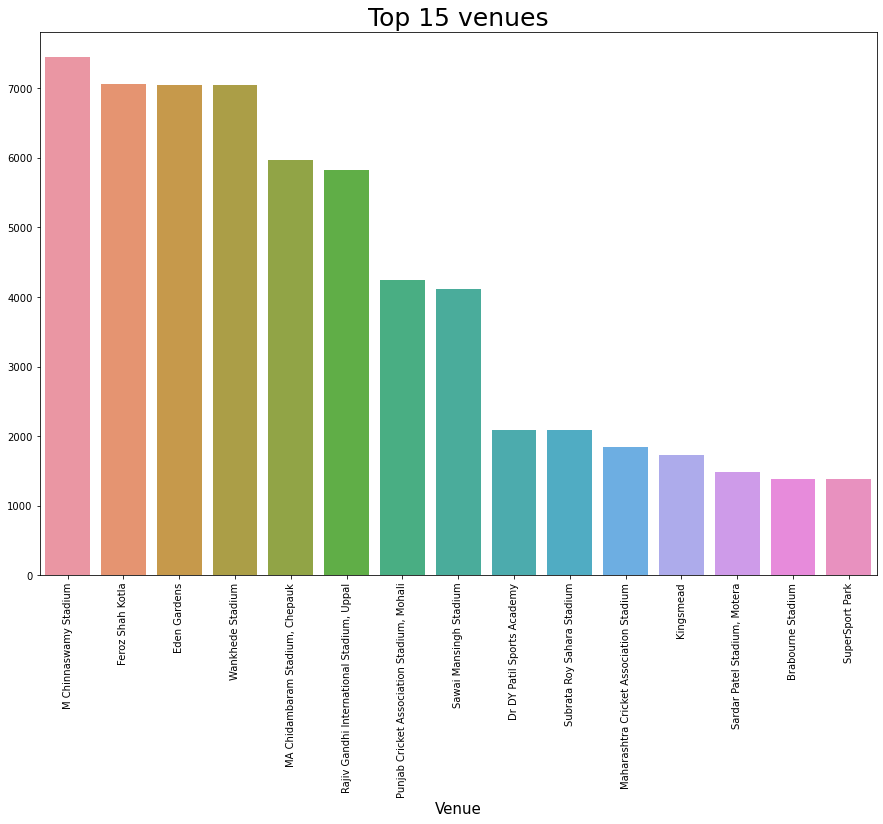

In [20]:
#Visualize the top 15 stadiums with barplot
import seaborn as sns
plt.figure(figsize=(15,10))
g=sns.barplot(x=data['venue'].value_counts().nlargest(15).index,y=data['venue'].value_counts().nlargest(15).values)
g.set_title('Top 15 venues',fontsize=25)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel('Venue',fontsize=15)
plt.show()

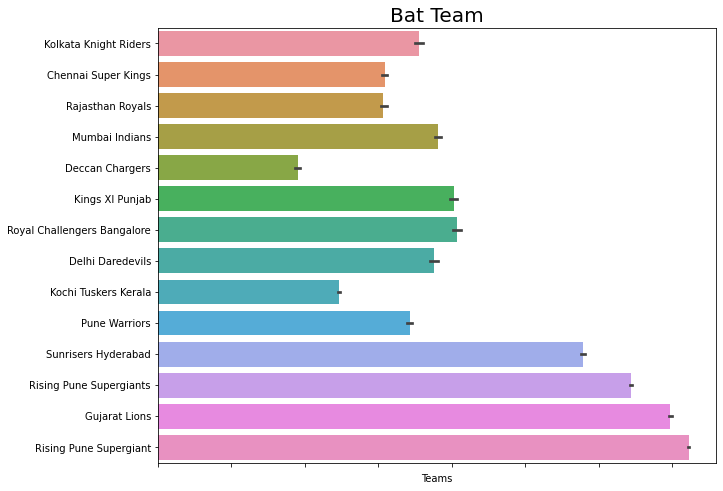

In [21]:
#visualize the bat team and bowl team wih the help of barplot
plt.figure(figsize=(10,8))
g=sns.barplot(x=data['bat_team'].index,y=data['bat_team'].values)
g.set_title('Bat Team',fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel('Teams')
plt.show()

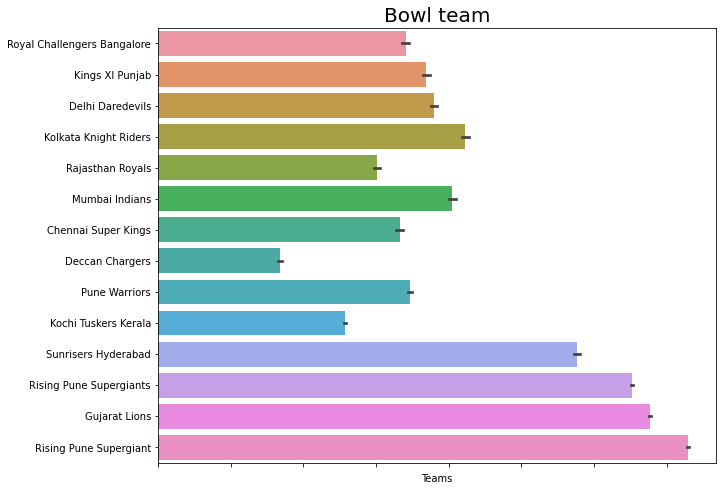

In [22]:
plt.figure(figsize=(10,8))
g=sns.barplot(x=data['bowl_team'].index,y=data['bowl_team'].values)
g.set_title('Bowl team',fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel('Teams')
plt.show()

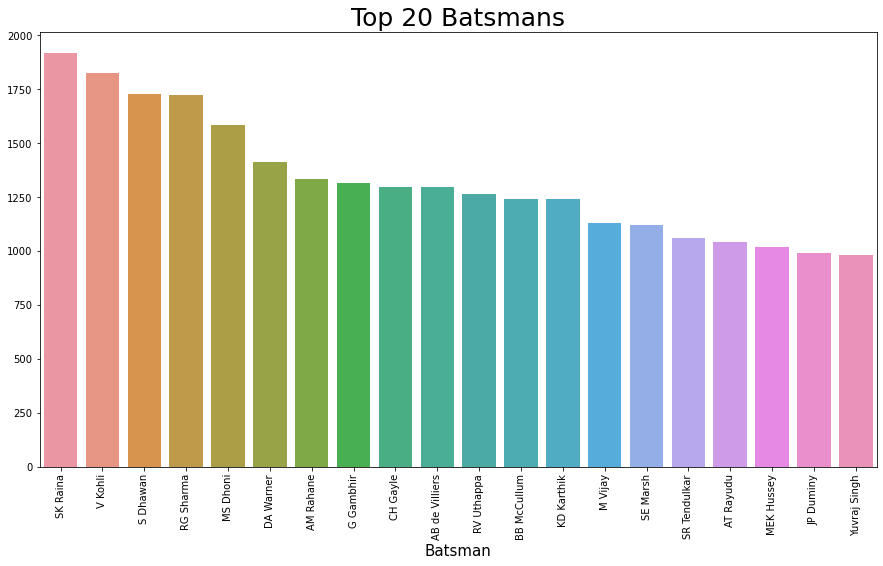

In [23]:
#Visualize the top 20 batsmans
plt.figure(figsize=(15,8))
g=sns.barplot(x=data['batsman'].value_counts().nlargest(20).index,y=data['batsman'].value_counts().nlargest(20).values)
g.set_title('Top 20 Batsmans',fontsize=25)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel('Batsman',fontsize=15)
plt.show()

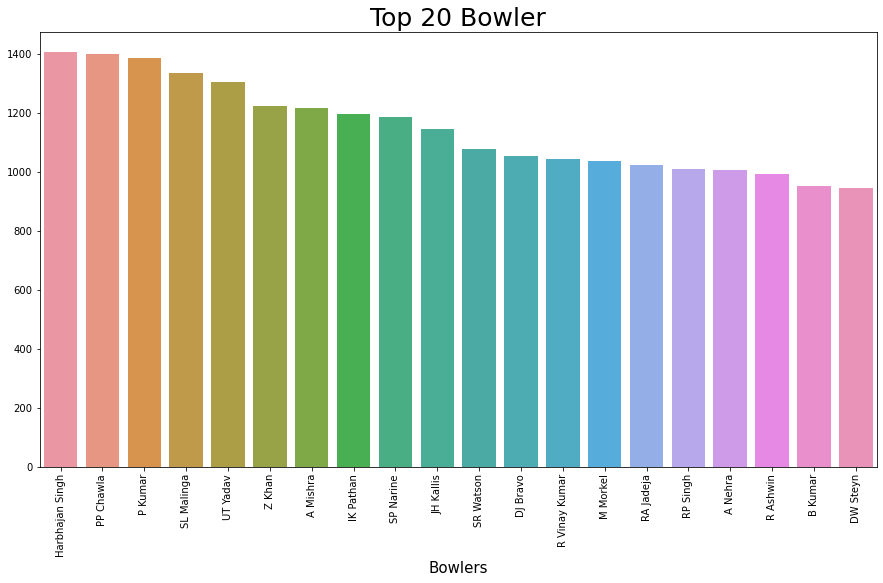

In [24]:
plt.figure(figsize=(15,8))
g=sns.barplot(x=data['bowler'].value_counts().nlargest(20).index,y=data['bowler'].value_counts().nlargest(20).values)
g.set_title('Top 20 Bowler',fontsize=25)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel('Bowlers',fontsize=15)
plt.show()

In [25]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


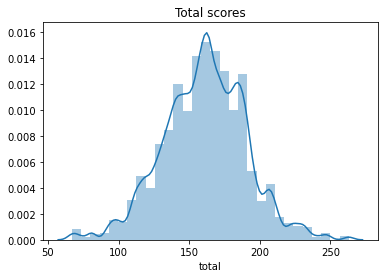

In [26]:
#Visualize the distribution plot with the help of distplot
fg=sns.distplot(data['total'],bins=30)
fg.set_title('Total scores')
plt.show()

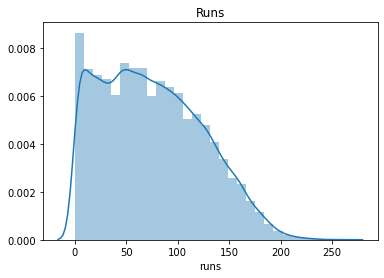

In [27]:
fg=sns.distplot(data['runs'],bins=30)
fg.set_title('Runs')
plt.show()

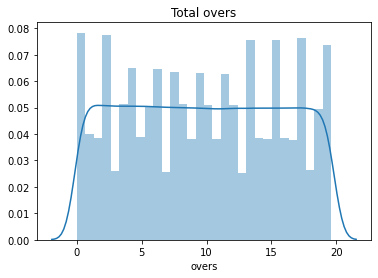

In [28]:
fg=sns.distplot(data['overs'],bins=30)
fg.set_title('Total overs')
plt.show()

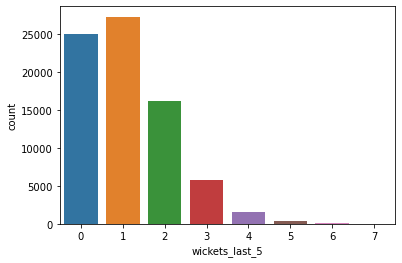

In [29]:
sns.countplot(data['wickets_last_5'])

<Figure size 720x504 with 0 Axes>

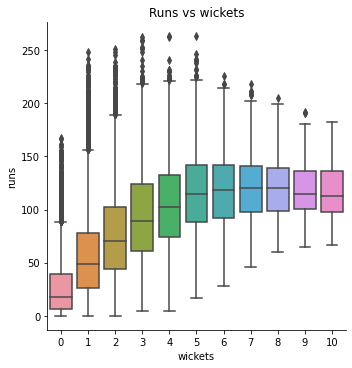

In [30]:
plt.figure(figsize=(10,7))
sns.catplot(x='wickets',y='runs',data=data,kind='box')
plt.title('Runs vs wickets')
plt.show()

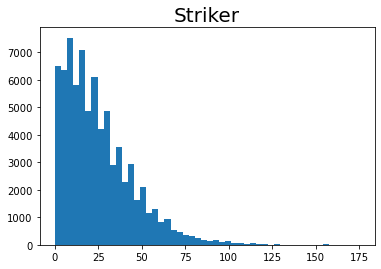

In [31]:
plt.hist(data['striker'],bins=50)
plt.title('Striker',fontsize=20)
plt.show()

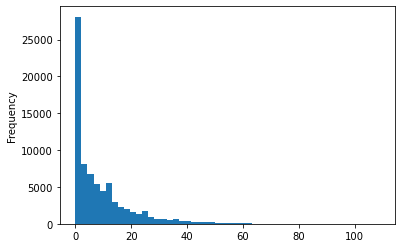

In [32]:
data['non-striker'].plot.hist(bins=50)

<Figure size 720x576 with 0 Axes>

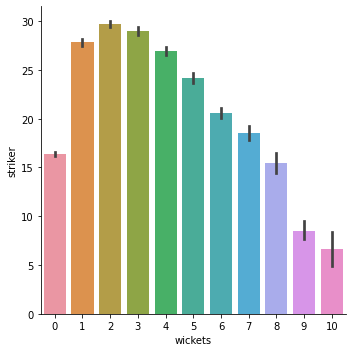

In [33]:
plt.figure(figsize=(10,8))
sns.catplot(x='wickets',y='striker',data=data,kind='bar')
plt.show()

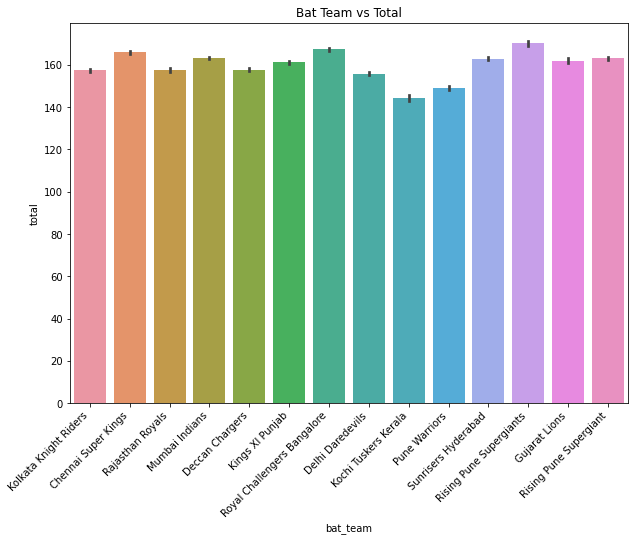

In [34]:
plt.figure(figsize=(10,7))
g=sns.barplot(x='bat_team',y='total',data=data)
g.set_title('Bat Team vs Total')
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

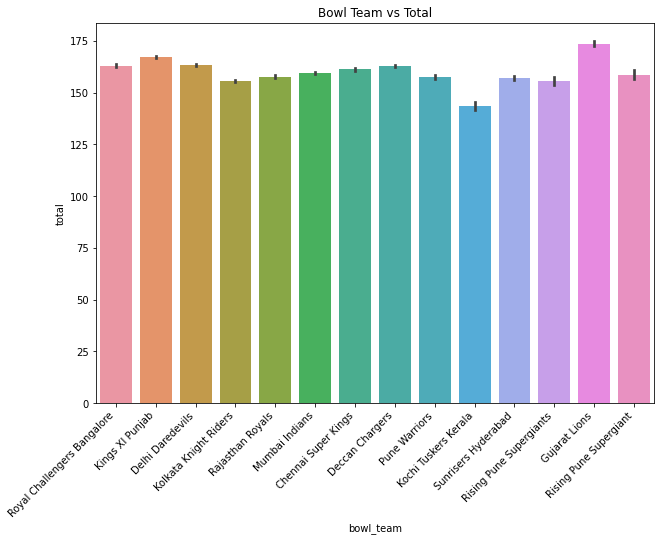

In [35]:
plt.figure(figsize=(10,7))
g=sns.barplot(x='bowl_team',y='total',data=data)
g.set_title('Bowl Team vs Total')
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

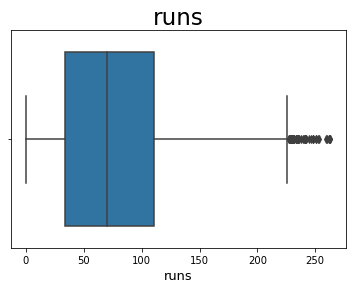

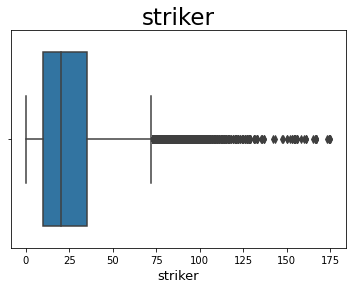

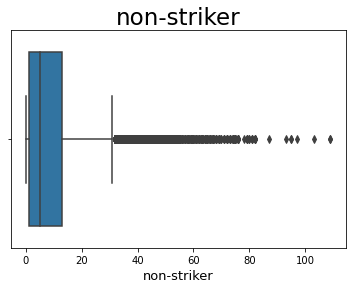

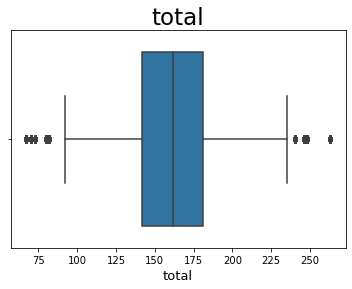

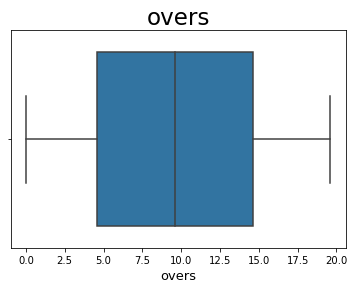

In [36]:
for feature in data[['runs','striker','non-striker','total','overs']]:
    sns.boxplot(data[feature])
    plt.title(feature,fontsize=23)
    plt.xlabel(feature,fontsize=13)
    plt.show()

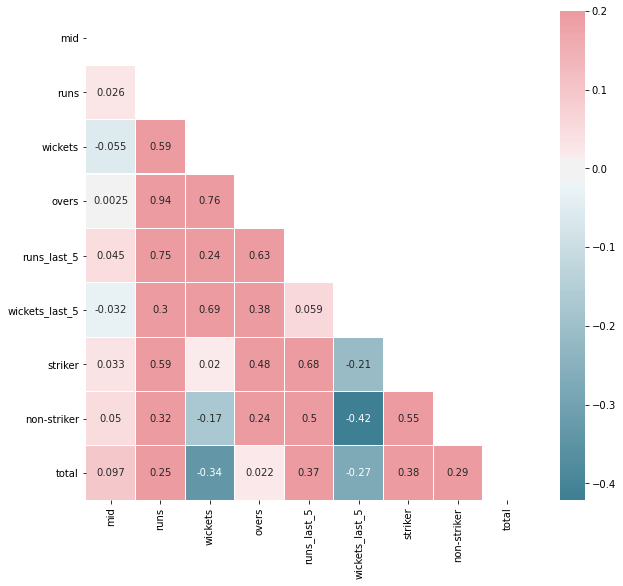

In [37]:
#visualize the data with heatmap
cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(10,9))
corr=data.corr()
#Genrate a mask for the heatmap
mask=np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(corr,mask=mask,cmap=cmap,annot=True,center=0,vmax=0.2,linewidths=0.05)

From the above we can observe that the column such as 'runs','wickets','overs','runs_last5','striker' are highly correlated

### Feature Engineering

In [38]:
#Change the dateformat in to separate column to make data is more understanding
#Create a columns such as 'date_day'
data['date_day']=pd.to_datetime(data['date']).dt.day

In [39]:
#Create a column 'date_month'
data['date_month']=pd.to_datetime(data['date']).dt.month

In [40]:
#Create a column 'date_year'
data['date_year']=pd.to_datetime(data['date']).dt.year

In [41]:
#Let's drop the date column
data=data.drop(labels=['date'],axis=1)

In [42]:
#Let's drop some unwanted columns
print('Before removing unwanted columns: {}'.format(data.shape))
data=data.drop(labels=['mid','venue','batsman','bowler','striker','non-striker'],axis=1)
print('After removing unwanted columns: {}'.format(data.shape))

Before removing unwanted columns: (76014, 17)
After removing unwanted columns: (76014, 11)


In [43]:
consistent_team=['Mumbai Indians',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Delhi Daredevils',
 'Rajasthan Royals',
 'Sunrisers Hyderabad']

In [44]:
#Keeping only consistent teams 
print('Before removing inconsistent teams: {}'.format(data.shape))
data=data[(data['bat_team'].isin(consistent_team)) & (data['bowl_team'].isin(consistent_team))]
print('After removing inconsistent teams: {}'.format(data.shape))

Before removing inconsistent teams: (76014, 11)
After removing inconsistent teams: (53811, 11)


In [45]:
#Remove first 5 overs in every match
print('Before removing the 5 overs: {}'.format(data.shape))
data=data[data['overs'] > 5.0]
print('After removing 5 overs: {}'.format(data.shape))

Before removing the 5 overs: (53811, 11)
After removing 5 overs: (40088, 11)


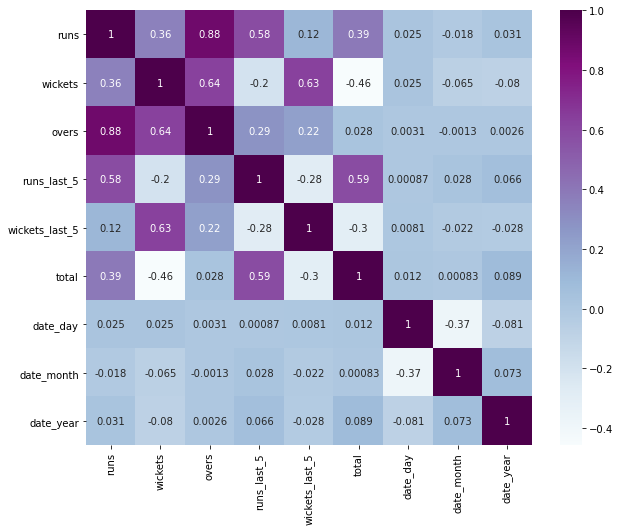

In [46]:
#Check the correalation with heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

### Data Preprocessing
1. Handle Categorical data
2. Splitting the data in to train and test

In [47]:
data.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,date_day,date_month,date_year
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,18,4,2008
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,18,4,2008
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,18,4,2008
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,18,4,2008
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,18,4,2008


In [48]:
encoded_data=pd.get_dummies(data=data,columns=['bat_team','bowl_team'],drop_first=True)

In [49]:
encoded_data.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'date_day', 'date_month', 'date_year', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [50]:
encoded_data.reset_index(drop=True)

,runs,wickets,overs,runs_last_5,wickets_last_5,total,date_day,date_month,date_year,bat_team_Delhi Daredevils,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,61,0,5.1,59,0,222,18,4,2008,0,...,0,0,0,0,0,0,0,0,1,0
1,61,1,5.2,59,1,222,18,4,2008,0,...,0,0,0,0,0,0,0,0,1,0
2,61,1,5.3,59,1,222,18,4,2008,0,...,0,0,0,0,0,0,0,0,1,0
3,61,1,5.4,59,1,222,18,4,2008,0,...,0,0,0,0,0,0,0,0,1,0
4,61,1,5.5,58,1,222,18,4,2008,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40083,106,9,18.1,29,4,107,19,5,2017,0,...,0,0,0,0,0,0,1,0,0,0
40084,107,9,18.2,29,4,107,19,5,2017,0,...,0,0,0,0,0,0,1,0,0,0
40085,107,9,18.3,28,4,107,19,5,2017,0,...,0,0,0,0,0,0,1,0,0,0
40086,107,9,18.4,24,4,107,19,5,2017,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
encoded_data.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,date_day,date_month,date_year,bat_team_Delhi Daredevils,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,222,18,4,2008,0,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,222,18,4,2008,0,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,222,18,4,2008,0,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,222,18,4,2008,0,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,222,18,4,2008,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
x=encoded_data.drop('total',1)
y=encoded_data['total']

In [54]:
print(x.shape,y.shape)

(40088, 22) (40088,)


### Model Building

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

let's try with 5 Experiments with 7 algorithems Such as
1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. DecisionTreeRegressor
5. RandomForestRegressor
6. KNeighborsRegressor

---Boosting algorithems---
1. Xgboost
2. Adaptive boosting(Adaboost)

#### 1. Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [57]:
reg_pred=reg.predict(x_test)
reg_pred[:9]

array([137.10928121, 144.23757785, 144.65873285, 166.3759651 ,
       160.98611402, 177.98517065, 169.32894496, 182.49715857,
       129.05632369])

In [58]:
print('Coefficient:--->',reg.coef_)
print('Intercept:---->',reg.intercept_)

Coefficient:---> [ 0.96473676 -4.99176346 -6.38989555 -0.02042108 -1.14062953 -0.04481411
 -0.74800845  0.24855794 -4.12916721 -0.31355962 -4.35343285  1.09745404
 -4.96633744  2.03272736 -1.02341052  0.58023621  1.36186378 -4.15728834
 -0.27186752  0.17742428  0.3073002  -2.00783195]
Intercept:----> -327.916232576899


In [59]:
#Metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean squared error: {}'.format(mean_squared_error(y_test,reg_pred)))
print('Mean Absolute error: {}'.format(mean_absolute_error(y_test,reg_pred)))
print('Mean squared error: {}'.format(np.sqrt(mean_squared_error(y_test,reg_pred))))

Mean squared error: 304.29691766031044
Mean Absolute error: 13.048831587931122
Mean squared error: 17.444108393962427


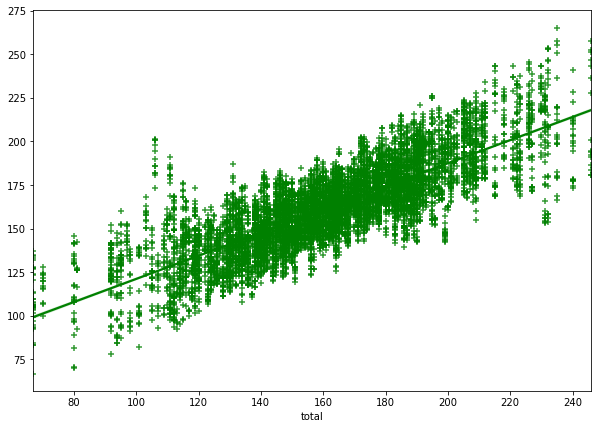

In [60]:
#Check the relation ship between y_test,reg_pred with reg plot
plt.figure(figsize=(10,7))
sns.regplot(y_test,reg_pred,marker='+',color='green')
plt.show()

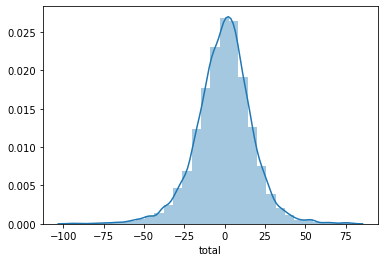

In [61]:
sns.distplot(y_test-reg_pred,bins=30)

### 2. Lasso

In [68]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)

Lasso()

In [69]:
ls_pred=ls.predict(x_test)
ls_pred[:9]

array([141.39940391, 149.93369257, 141.15970899, 162.70365645,
       162.79029077, 174.31763861, 172.6229252 , 181.41091601,
       132.02290727])

In [70]:
print('Mean squared error: {}'.format(mean_squared_error(y_test,ls_pred)))
print('Mean Absolute error: {}'.format(mean_absolute_error(y_test,ls_pred)))
print('Mean squared error: {}'.format(np.sqrt(mean_squared_error(y_test,ls_pred))))

Mean squared error: 314.0724056819603
Mean Absolute error: 13.111562160087612
Mean squared error: 17.722088073417314


### 3. Ridge

In [71]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(x_train,y_train)

Ridge()

In [72]:
rd_pred=rd.predict(x_test)
rd_pred[:9]

array([137.11171194, 144.23952547, 144.65557268, 166.3726127 ,
       160.98658586, 177.984741  , 169.3315324 , 182.4976103 ,
       129.05793175])

In [73]:
print('Mean squared error: {}'.format(mean_squared_error(y_test,rd_pred)))
print('Mean Absolute error: {}'.format(mean_absolute_error(y_test,rd_pred)))
print('Mean squared error: {}'.format(np.sqrt(mean_squared_error(y_test,rd_pred))))

Mean squared error: 304.29606738564166
Mean Absolute error: 13.048745593680575
Mean squared error: 17.444084022545916


### 4. DecisionTreeRegression

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [63]:
dt_pred=dt_reg.predict(x_test)
dt_pred[:9]

array([114., 177., 140., 188., 166., 170., 180., 185., 130.])

In [64]:
print('Mean squared error: {}'.format(mean_squared_error(y_test,dt_pred)))
print('Mean Absolute error: {}'.format(mean_absolute_error(y_test,dt_pred)))
print('Mean squared error: {}'.format(np.sqrt(mean_squared_error(y_test,dt_pred))))

Mean squared error: 55.31690281380962
Mean Absolute error: 1.9105966872879665
Mean squared error: 7.437533382366066


In [65]:
from sklearn.metrics import r2_score
print('R2 Score: {}'.format(r2_score(y_test,dt_pred)))

R2 Score: 0.9382611239108669


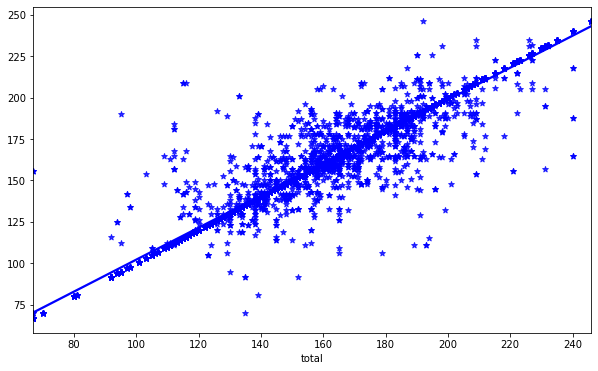

In [66]:
#Check the relationship with regplot
plt.figure(figsize=(10,6))
sns.regplot(y_test,dt_pred,marker='*',color='blue')
plt.show()

### 5. RandomForestRegressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(x_train,y_train)

RandomForestRegressor()

In [75]:
random_pred=random.predict(x_test)
random_pred[:9]

array([113.87, 180.16, 141.58, 184.83, 157.48, 173.36, 176.72, 185.31,
       135.18])

In [76]:
print('Mean squared error: {}'.format(mean_squared_error(y_test,random_pred)))
print('Mean Absolute error: {}'.format(mean_absolute_error(y_test,random_pred)))
print('Mean squared error: {}'.format(np.sqrt(mean_squared_error(y_test,random_pred))))

Mean squared error: 20.426150957892638
Mean Absolute error: 2.389683695869088
Mean squared error: 4.519529948777045


In [79]:
print('R2 Score: {}'.format(r2_score(y_test,random_pred)))

R2 Score: 0.977202490761062


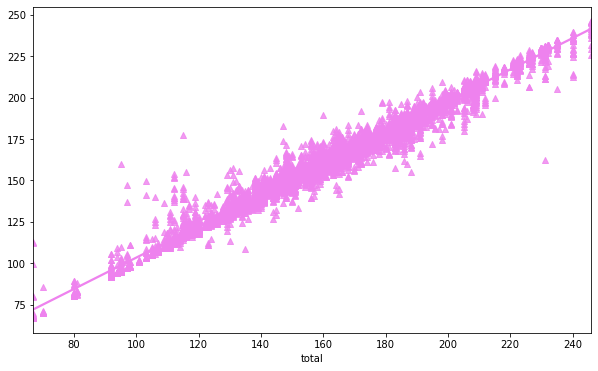

In [81]:
plt.figure(figsize=(10,6))
sns.regplot(y_test,random_pred,color='violet',marker='^')
plt.show()

### 6. KNeighborsRegressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [85]:
knn_pred=knn.predict(x_test)
knn_pred[:9]

array([120.375, 180.25 , 156.625, 159.25 , 180.875, 179.   , 162.   ,
       155.625, 134.375])

In [86]:
print('Mean squared error: {}'.format(mean_squared_error(y_test,knn_pred)))
print('Mean Absolute error: {}'.format(mean_absolute_error(y_test,knn_pred)))
print('Mean squared error: {}'.format(np.sqrt(mean_squared_error(y_test,knn_pred))))
print('R2 Score: {}'.format(r2_score(y_test,knn_pred)))

Mean squared error: 192.66176910796247
Mean Absolute error: 9.850354220714427
Mean squared error: 13.88026545524121
R2 Score: 0.7849713110275547


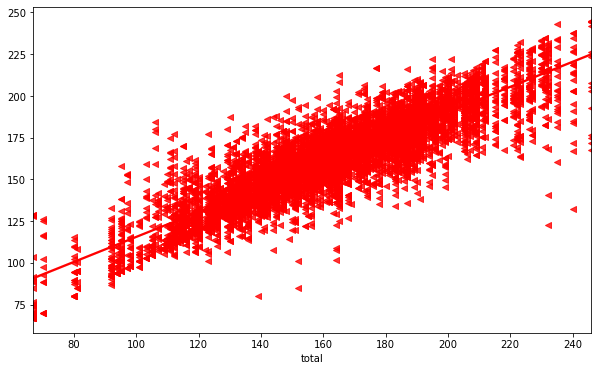

In [89]:
plt.figure(figsize=(10,6))
sns.regplot(y_test,knn_pred,color='red',marker='<')
plt.show()